In [ ]:
import os
VENV_PYTHON = os.path.abspath("../.venv/bin/python")
print(VENV_PYTHON)

/home/rohovyi/DFL/.venv/bin/python


# Running your first simulation

In [ ]:

import subprocess
import time
import shutil
import os
SEED = 42
NUM_ROUNDS = 30
NUM_CLIENTS = 10
EPOCHS = 1
DATASET_NAME = "FashionMNIST"
ALPHA_DIRICHLET = 1
BATCH_SIZE = 32
LEARNING_RATE = 0.01

folder = f"results_first"
log_folder = os.path.join(folder, "logs")

def run_simulation():
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")
    os.makedirs(log_folder, exist_ok=True)

    server_cmd = [
        VENV_PYTHON, "run_server.py",
        "--rounds", str(NUM_ROUNDS),
        "--epochs", str(EPOCHS),
        "--clients", str(NUM_CLIENTS),
        "--alpha", str(ALPHA_DIRICHLET),
        "--lr", str(LEARNING_RATE),
        "--batch", str(BATCH_SIZE),
        "--output", folder,
    ]
    server_log_path = os.path.join(log_folder, "server.log")
    server_log = open(server_log_path, "w")
    server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
    print(f"Started server (PID {server_proc.pid})")
    time.sleep(10)

    client_procs = []
    for cid in range(NUM_CLIENTS):
        client_cmd = [
            VENV_PYTHON, "run_client.py",
            "--cid", str(cid),
            "--batch", str(BATCH_SIZE),
        ]
        client_log_path = os.path.join(log_folder, f"client_{cid}.log")
        client_log = open(client_log_path, "w")
        proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
        client_procs.append((proc, client_log))
        print(f"Started client {cid} (PID {proc.pid})")
        time.sleep(0.2)

    for proc, log in client_procs:
        proc.wait()
        log.close()

    server_proc.terminate()
    server_proc.wait()
    server_log.close()
    print("Simulation finished.")


run_simulation()

Deleted existing folder: results_first
Started server (PID 8129)
Started client 0 (PID 8204)
Started client 1 (PID 8205)
Started client 2 (PID 8206)
Started client 3 (PID 8207)
Started client 4 (PID 8222)
Started client 5 (PID 8237)
Started client 6 (PID 8249)
Started client 7 (PID 8261)
Started client 8 (PID 8262)
Started client 9 (PID 8285)


Since we're running a single simulation here, not a set of tests, plot 2 will be useless.

In [8]:
! python vizualizer.py --folder results_first --param_index 0 --print_table --plot_type 1

+--------+-------+--------+-------+------+-------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
|   30   |   1   |   10   |   32  | 0.01 |  1.0  | 0.8460910389875484 | 0.43714689866763773 |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
Saved Fit Metrics plot to results_first/plot1.png
Saved Eval Metrics plot to results_first/plot2.png


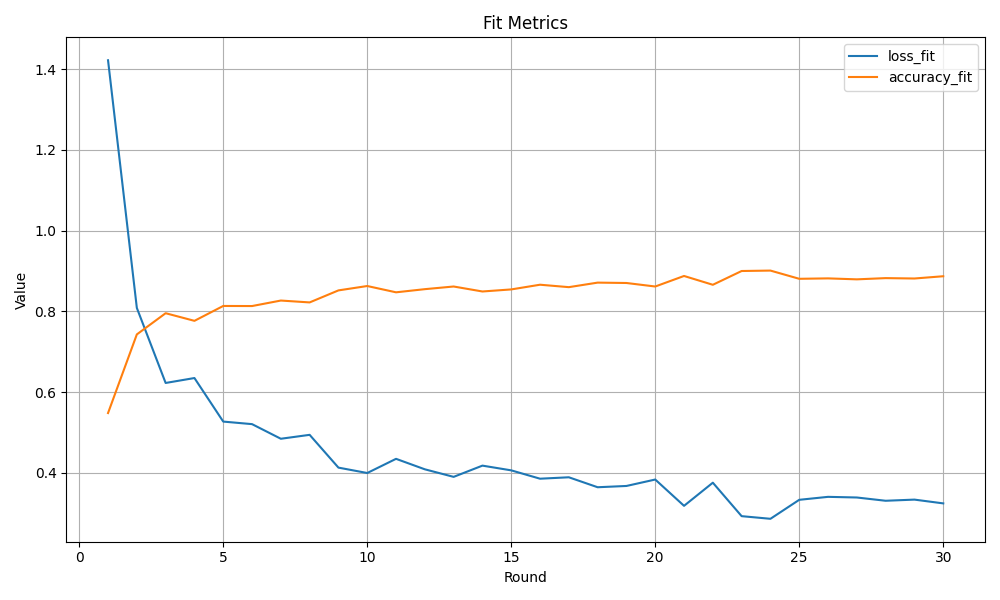

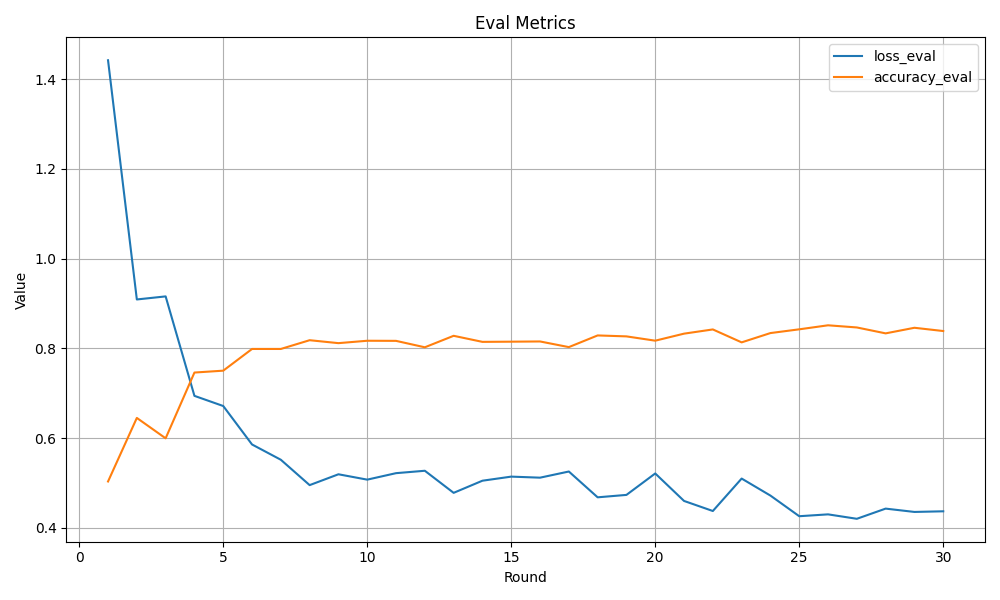

In [9]:
from IPython.display import Image, display

plot1_path = 'results_first/plot1.png'
plot2_path = 'results_first/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Experiment 1 - Number of rounds

In [22]:
import os
import subprocess
import time
import shutil

folder = f"results_rounds"


def run_experiment(rounds_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for r in rounds_list:
        log_folder = os.path.join(folder, f"logs_r{r}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {r} rounds ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", str(r),
            "--output", folder,
        ]
        server_log_path = os.path.join(log_folder, f"server_{r}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "32"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_r{r}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {r} rounds ===\n")

rounds_list = [8, 16, 32, 64, 128, 256]
run_experiment(rounds_list)

Deleted existing folder: results_rounds

=== Running test for 8 rounds ===
Started server (PID 66753)
Started client 0 (PID 66797)
Started client 1 (PID 66798)
Started client 2 (PID 66799)
Started client 3 (PID 66811)
Started client 4 (PID 66823)
Started client 5 (PID 66839)
Started client 6 (PID 66853)
Started client 7 (PID 66865)
Started client 8 (PID 66866)
Started client 9 (PID 66878)
=== Finished test for 8 rounds ===


=== Running test for 16 rounds ===
Started server (PID 67462)
Started client 0 (PID 67485)
Started client 1 (PID 67486)
Started client 2 (PID 67507)
Started client 3 (PID 67519)
Started client 4 (PID 67537)
Started client 5 (PID 67549)
Started client 6 (PID 67550)
Started client 7 (PID 67562)
Started client 8 (PID 67574)
Started client 9 (PID 67586)
=== Finished test for 16 rounds ===


=== Running test for 32 rounds ===
Started server (PID 68294)
Started client 0 (PID 68323)
Started client 1 (PID 68324)
Started client 2 (PID 68345)
Started client 3 (PID 68357)
Sta

In [23]:
! python vizualizer.py --folder results_rounds --param_index 0 --print_table

+--------+-------+--------+-------+------+-------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
|   8    |   1   |   10   |   32  | 0.01 |   1   | 0.8183920313055852 |  0.4978452095121135 |
|   16   |   1   |   10   |   32  | 0.01 |   1   | 0.7896551724137931 |  0.5527331704723424 |
|   32   |   1   |   10   |   32  | 0.01 |   1   | 0.8521008403361344 | 0.41486575476762627 |
|   64   |   1   |   10   |   32  | 0.01 |   1   | 0.8498886414253898 |  0.4124078724281648 |
|  128   |   1   |   10   |   32  | 0.01 |   1   | 0.8728827495477718 |  0.3417402090965143 |
|  256   |   1   |   10   |   32  | 0.01 |   1   | 0.8853767560664112 | 0.33289096984027444 |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
Saved metric curve plots to results_rounds/plot1.png
Saved f

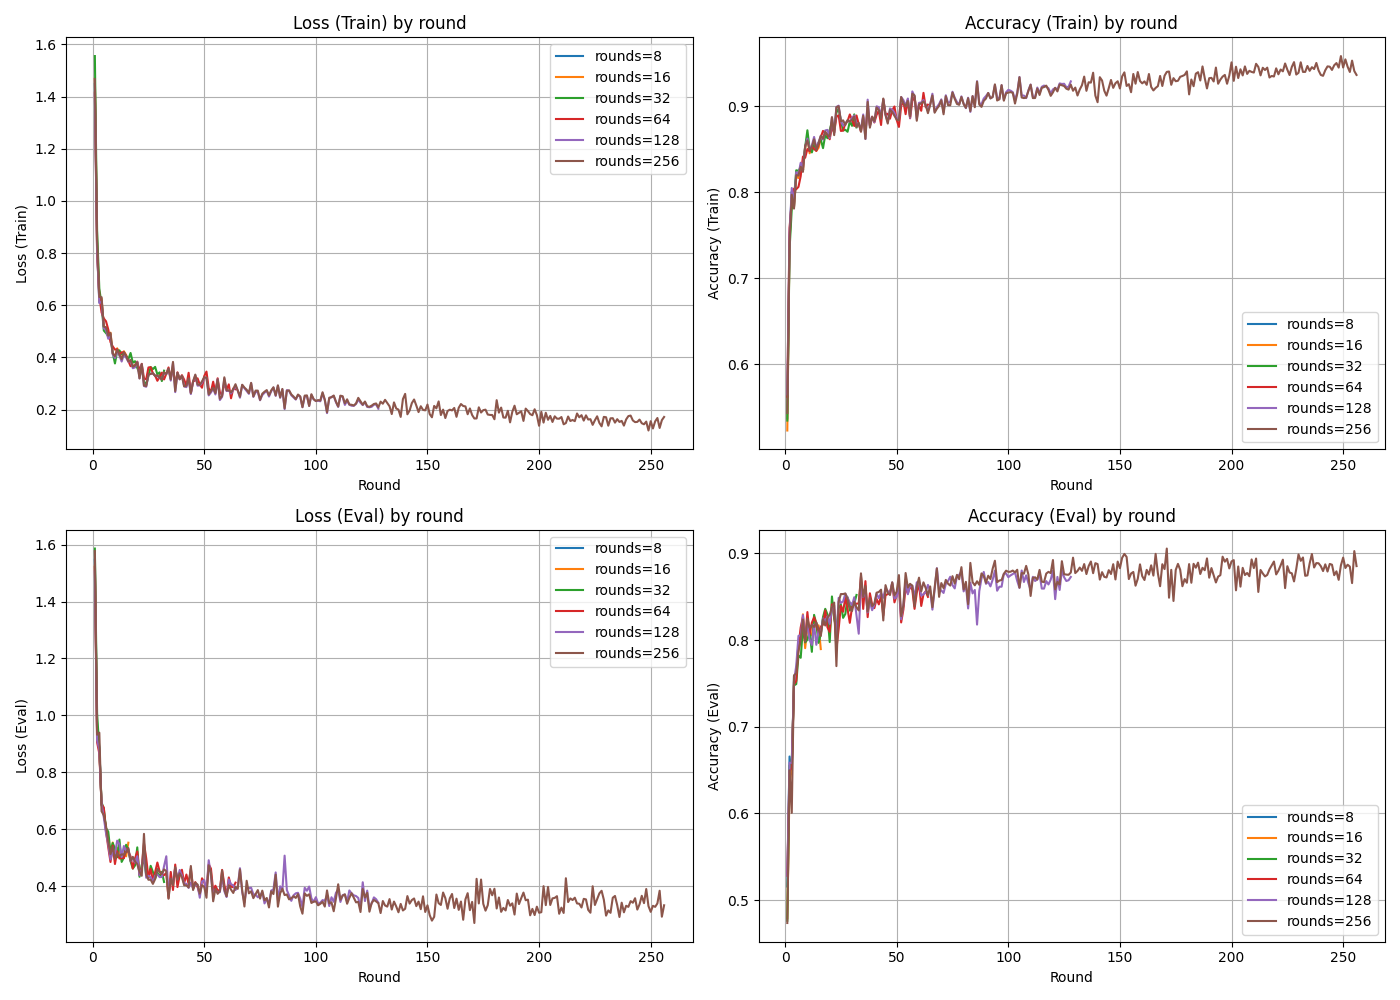

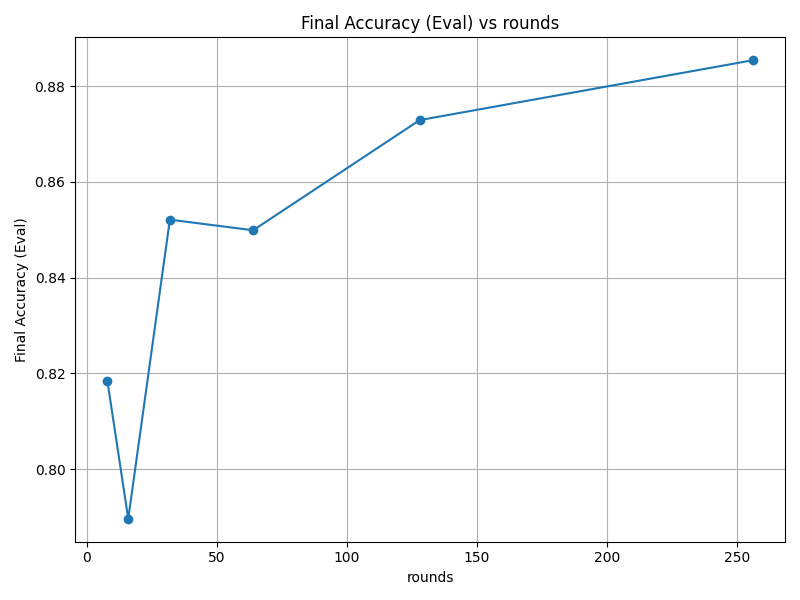

In [24]:
from IPython.display import Image, display

plot1_path = 'results_rounds/plot1.png'
plot2_path = 'results_rounds/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Experiment 2 - Number of epochs per round

In [26]:
import os
import subprocess
import time
import shutil

folder = f"results_epochs"


def run_experiment(epochs_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for e in epochs_list:
        log_folder = os.path.join(folder, f"logs_e{e}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {e} epochs ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "128",
            "--epochs", str(e),
            "--output", folder,
        ]
        server_log_path = os.path.join(log_folder, f"server_{e}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "32"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_e{e}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {e} epochs ===\n")

epochs_list = [1, 2, 4, 8, 16]
run_experiment(epochs_list)

Deleted existing folder: results_epochs

=== Running test for 1 epochs ===
Started server (PID 91892)
Started client 0 (PID 91921)
Started client 1 (PID 91922)
Started client 2 (PID 91923)
Started client 3 (PID 91955)
Started client 4 (PID 91964)
Started client 5 (PID 91973)
Started client 6 (PID 91980)
Started client 7 (PID 91999)
Started client 8 (PID 92014)
Started client 9 (PID 92015)
=== Finished test for 1 epochs ===


=== Running test for 2 epochs ===
Started server (PID 94467)
Started client 0 (PID 94490)
Started client 1 (PID 94514)
Started client 2 (PID 94518)
Started client 3 (PID 94530)
Started client 4 (PID 94542)
Started client 5 (PID 94554)
Started client 6 (PID 94555)
Started client 7 (PID 94567)
Started client 8 (PID 94568)
Started client 9 (PID 94580)
=== Finished test for 2 epochs ===


=== Running test for 4 epochs ===
Started server (PID 97606)
Started client 0 (PID 97649)
Started client 1 (PID 97650)
Started client 2 (PID 97651)
Started client 3 (PID 97663)
Starte

In [27]:
! python vizualizer.py --folder results_epochs --param_index 1 --print_table

+--------+-------+--------+-------+------+-------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
|  128   |   1   |   10   |   32  | 0.01 |   1   | 0.8814339746752179 |  0.329260656054799  |
|  128   |   2   |   10   |   32  | 0.01 |   1   | 0.8870779976717112 | 0.33146457197898915 |
|  128   |   4   |   10   |   32  | 0.01 |   1   | 0.8866779089376053 |  0.5170350580653694 |
|  128   |   8   |   10   |   32  | 0.01 |   1   | 0.8783094885709587 |  0.6874802833108442 |
|  128   |   16  |   10   |   32  | 0.01 |   1   | 0.8858740338760073 |  0.7598646146512859 |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
Saved metric curve plots to results_epochs/plot1.png
Saved final accuracy vs param plot to results_epochs/plot2.png


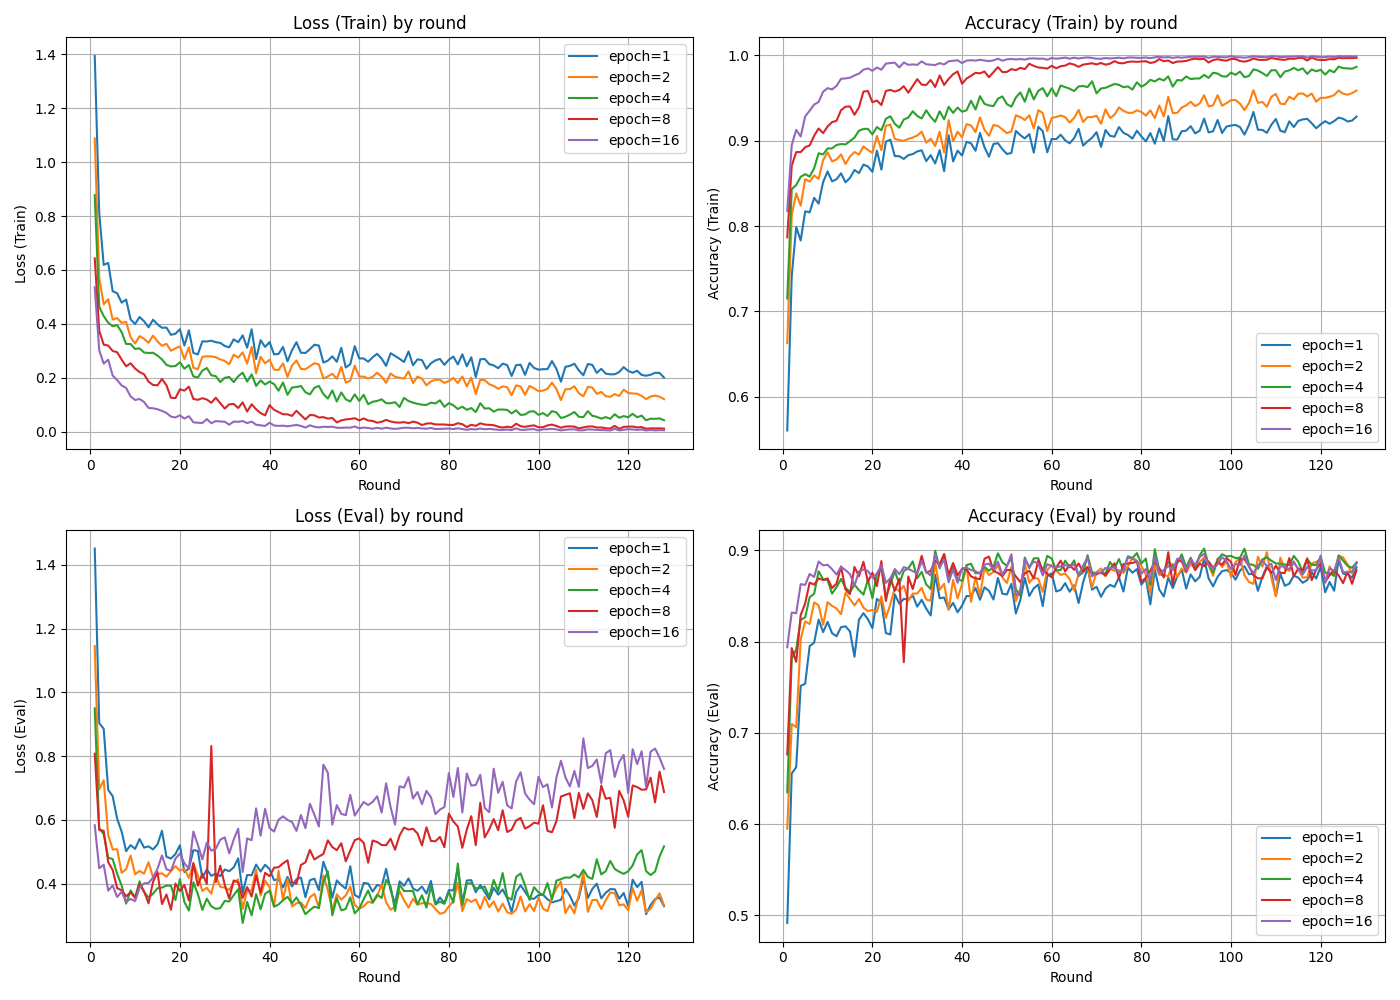

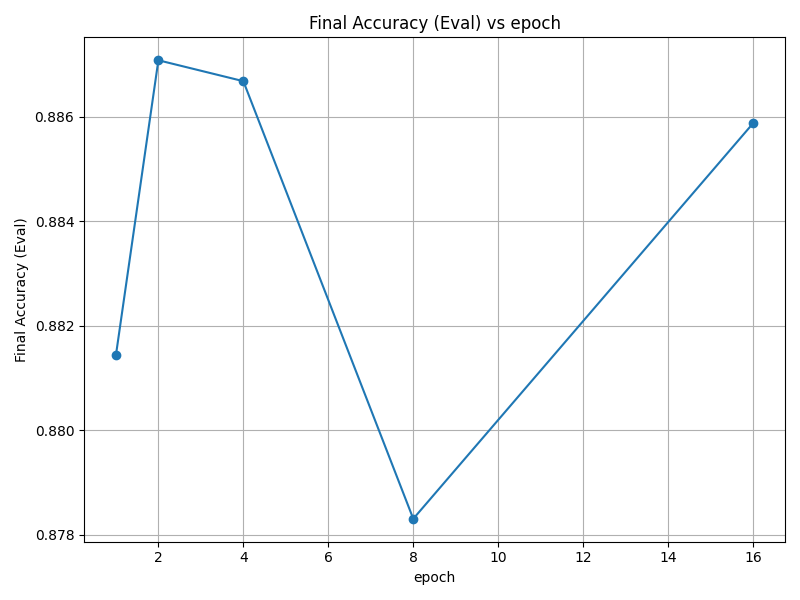

In [28]:
from IPython.display import Image, display

plot1_path = 'results_epochs/plot1.png'
plot2_path = 'results_epochs/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Experiment 3 - Number of Clients

In [ ]:
import os
import subprocess
import time
import shutil

folder = "results_clients"


def run_experiment(clients_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for c in clients_list:
        log_folder = os.path.join(folder, f"logs_c{c}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {c} clients ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "128",
            "--epochs", "2",
            "--clients", str(c),
            "--output", folder,
        ]
        server_log_path = os.path.join(log_folder, f"server_{c}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(c):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "32"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_c{c}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {c} clients ===\n")

clients_list = [4, 8, 16]
run_experiment(clients_list)

Deleted existing folder: results_clients

=== Running test for 4 clients ===
Started server (PID 136202)
Started client 0 (PID 136220)
Started client 1 (PID 136221)
Started client 2 (PID 136222)
Started client 3 (PID 136235)
=== Finished test for 4 clients ===


=== Running test for 8 clients ===
Started server (PID 139615)
Started client 0 (PID 139658)
Started client 1 (PID 139659)
Started client 2 (PID 139660)
Started client 3 (PID 139672)
Started client 4 (PID 139684)
Started client 5 (PID 139702)
Started client 6 (PID 139714)
Started client 7 (PID 139726)
=== Finished test for 8 clients ===


=== Running test for 16 clients ===
Started server (PID 142602)
Started client 0 (PID 142625)
Started client 1 (PID 142646)
Started client 2 (PID 142647)
Started client 3 (PID 142659)
Started client 4 (PID 142677)
Started client 5 (PID 142689)
Started client 6 (PID 142701)
Started client 7 (PID 142713)
Started client 8 (PID 142725)
Started client 9 (PID 142737)
Started client 10 (PID 142738)
S

KeyboardInterrupt: 

Here my PC wasn't happy about 32 clients, so i terminated the training. Logs show that after each round few clients were "dying".

In [32]:
! python vizualizer.py --folder results_clients --param_index 2 --print_table

+--------+-------+--------+-------+------+-------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
|  128   |   2   |   4    |   32  | 0.01 |   1   | 0.8324705882352941 |  0.7241713698331047 |
|  128   |   2   |   8    |   32  | 0.01 |   1   | 0.851534210024776  |  0.4577907424995916 |
|  128   |   2   |   16   |   32  | 0.01 |   1   | 0.8822141846202233 | 0.33571495553020186 |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
Saved metric curve plots to results_clients/plot1.png
Saved final accuracy vs param plot to results_clients/plot2.png


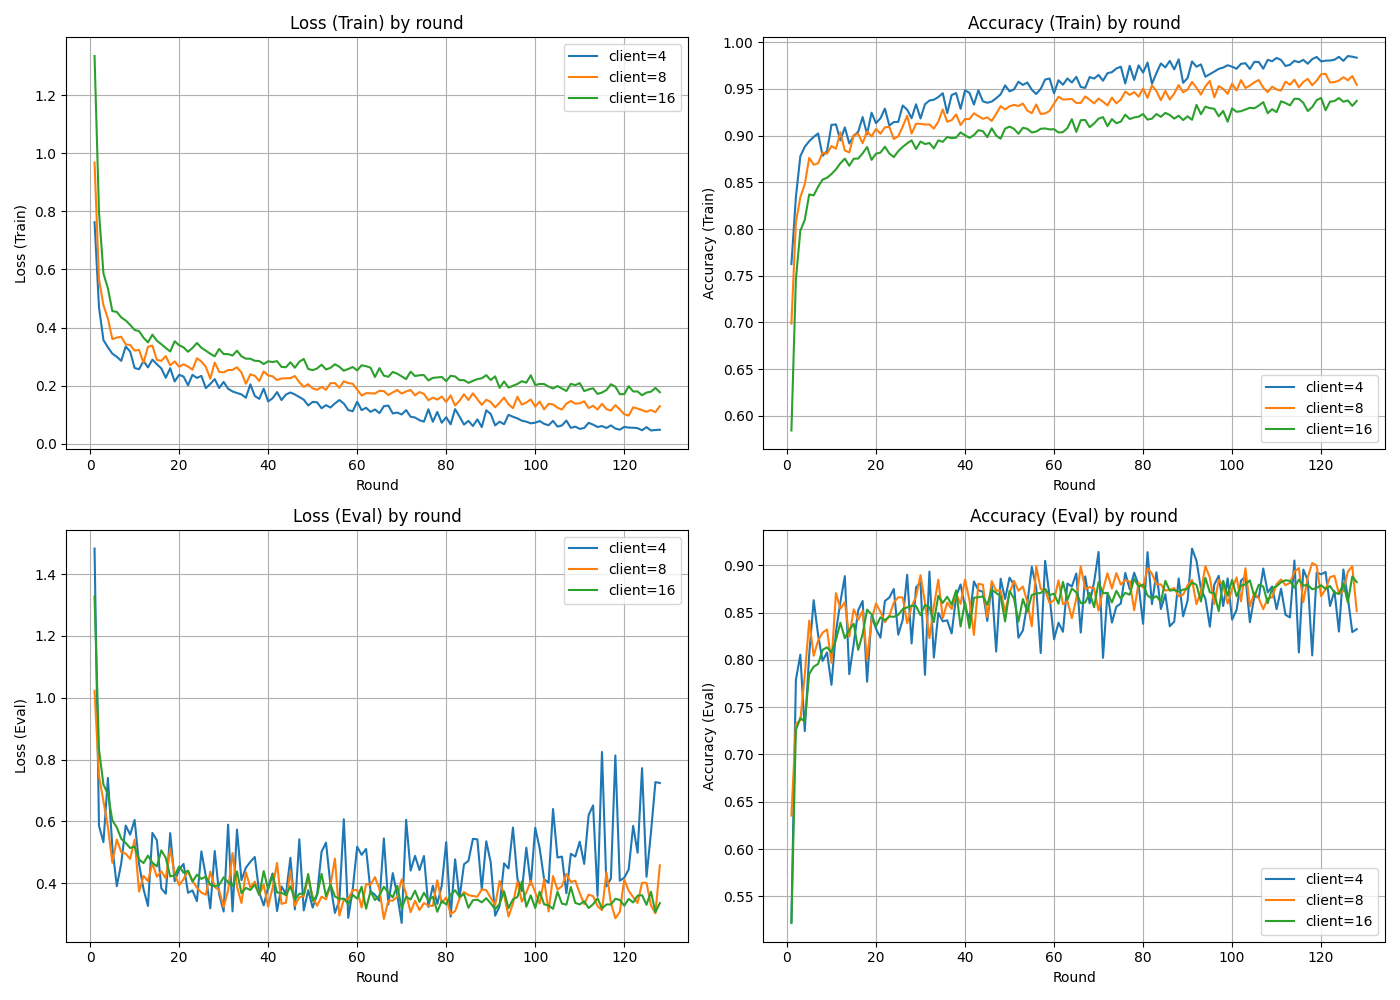

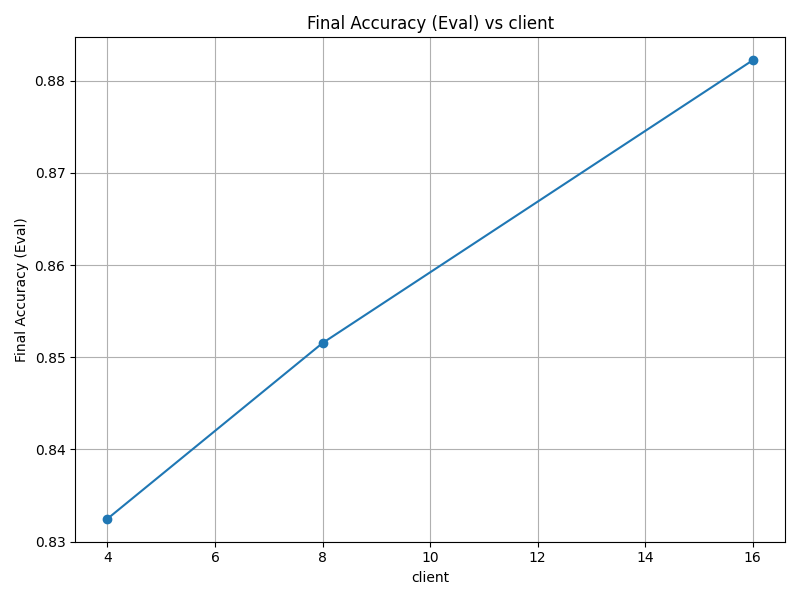

In [33]:
from IPython.display import Image, display

plot1_path = 'results_clients/plot1.png'
plot2_path = 'results_clients/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Experiment 4 - Batch Size

In [35]:
import os
import subprocess
import time
import shutil

folder = "results_batch"


def run_experiment(batch_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for b in batch_list:
        log_folder = os.path.join(folder, f"logs_b{b}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {b} batch size ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "128",
            "--epochs", "2",
            "--clients", "8",
            "--output", folder,
            "--batch", str(b)
        ]
        server_log_path = os.path.join(log_folder, f"server_{b}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(8):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", str(b)
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_b{b}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {b} batch size ===\n")

batch_list = [4, 8, 16, 32, 64, 128]
run_experiment(batch_list)

Deleted existing folder: results_batch

=== Running test for 4 batch size ===
Started server (PID 156196)
Started client 0 (PID 156245)
Started client 1 (PID 156246)
Started client 2 (PID 156247)
Started client 3 (PID 156259)
Started client 4 (PID 156271)
Started client 5 (PID 156272)
Started client 6 (PID 156284)
Started client 7 (PID 156296)
=== Finished test for 4 batch size ===


=== Running test for 8 batch size ===
Started server (PID 162264)
Started client 0 (PID 162313)
Started client 1 (PID 162314)
Started client 2 (PID 162315)
Started client 3 (PID 162327)
Started client 4 (PID 162339)
Started client 5 (PID 162351)
Started client 6 (PID 162363)
Started client 7 (PID 162369)
=== Finished test for 8 batch size ===


=== Running test for 16 batch size ===
Started server (PID 166585)
Started client 0 (PID 166634)
Started client 1 (PID 166635)
Started client 2 (PID 166636)
Started client 3 (PID 166648)
Started client 4 (PID 166660)
Started client 5 (PID 166672)
Started client 6 (P

In [36]:
! python vizualizer.py --folder results_batch --param_index 3 --print_table

+--------+-------+--------+-------+------+-------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
|  128   |   2   |   8    |   4   | 0.01 |   1   | 0.8930817610062893 |  0.5691088164207116 |
|  128   |   2   |   8    |   8   | 0.01 |   1   | 0.8892830470500374 |  0.5128787283279986 |
|  128   |   2   |   8    |   16  | 0.01 |   1   | 0.8879359634076616 | 0.40703663461681366 |
|  128   |   2   |   8    |   32  | 0.01 |   1   | 0.888507718696398  | 0.34380871578639227 |
|  128   |   2   |   8    |   64  | 0.01 |   1   | 0.8871736230226797 |  0.3094604679271337 |
|  128   |   2   |   8    |  128  | 0.01 |   1   | 0.8671621879169049 | 0.35903816650157794 |
+--------+-------+--------+-------+------+-------+--------------------+---------------------+
Saved metric curve plots to results_batch/plot1.png
Saved fi

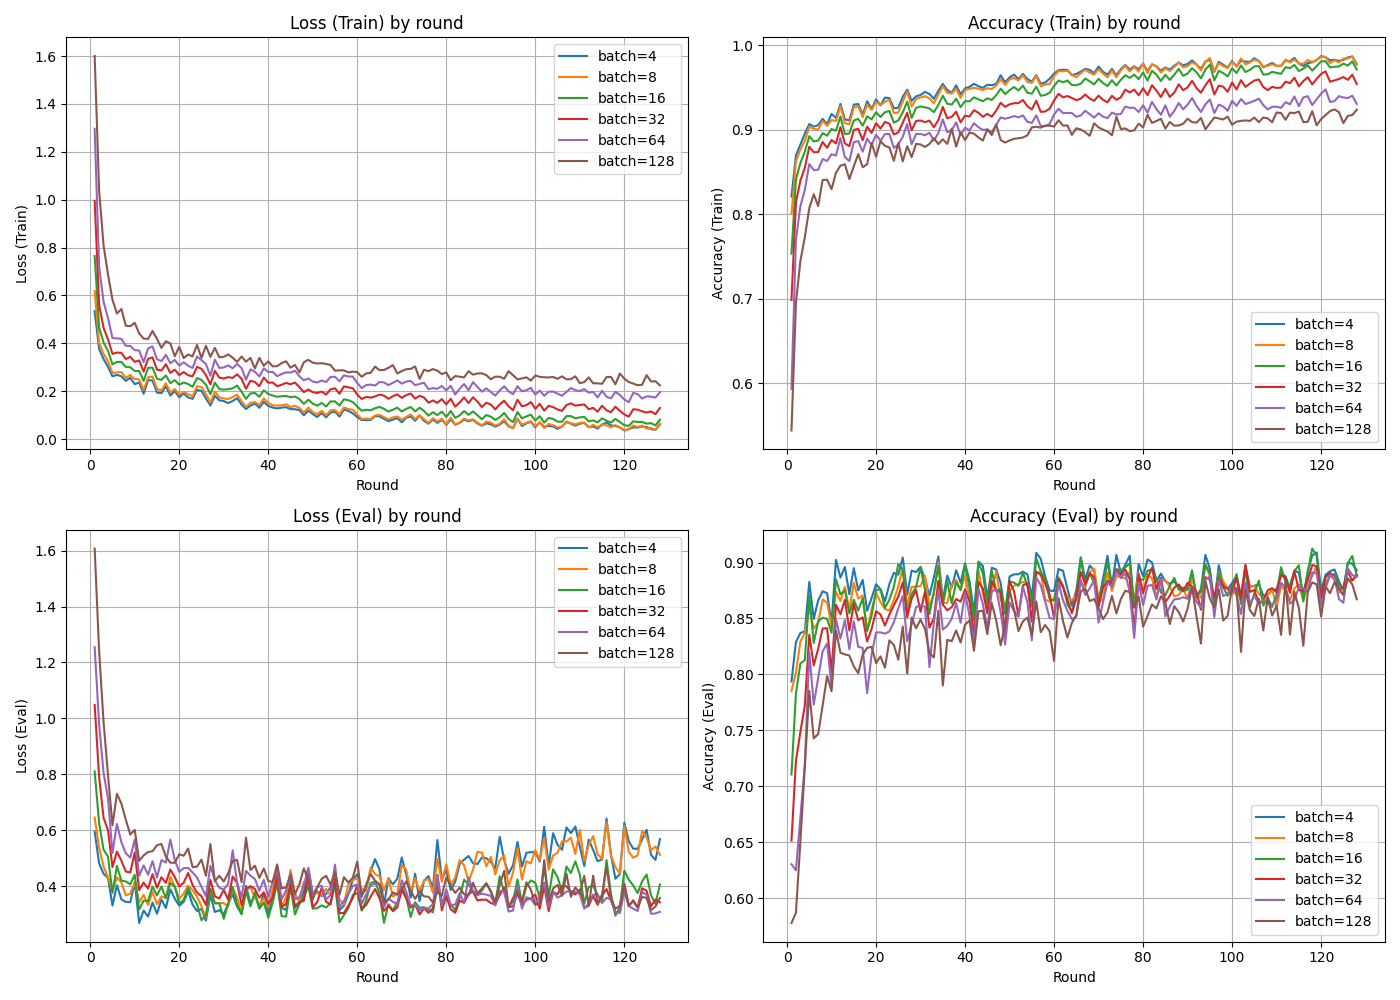

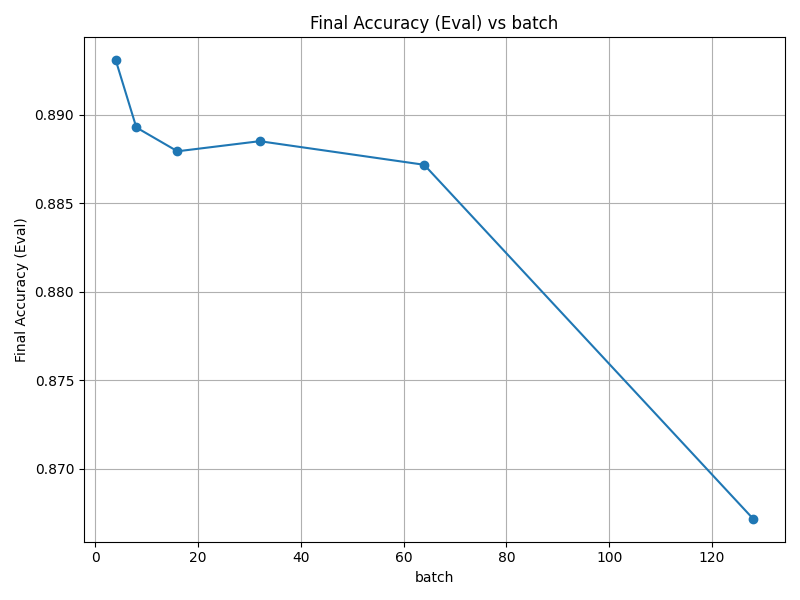

In [37]:
from IPython.display import Image, display

plot1_path = 'results_batch/plot1.png'
plot2_path = 'results_batch/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Experiment 5 - Learning Rate

In [3]:
import os
import subprocess
import time
import shutil

folder = "results_lr"


def run_experiment(lr_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for lr in lr_list:
        log_folder = os.path.join(folder, f"logs_lr{lr}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {lr} learning rate ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "32",
            "--epochs", "2",
            "--clients", "8",
            "--output", folder,
            "--batch", "16",
            "--lr", str(lr)
        ]
        server_log_path = os.path.join(log_folder, f"server_{lr}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(8):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", str(32)
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_lr{lr}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {lr} learning rate ===\n")

lr_list = [0.1,0.01,0.001,0.0001, 0.00001]
run_experiment(lr_list)

Deleted existing folder: results_lr

=== Running test for 0.1 learning rate ===
Started server (PID 1169)
Started client 0 (PID 1193)
Started client 1 (PID 1194)
Started client 2 (PID 1195)
Started client 3 (PID 1207)
Started client 4 (PID 1219)
Started client 5 (PID 1220)
Started client 6 (PID 1237)
Started client 7 (PID 1249)
=== Finished test for 0.1 learning rate ===


=== Running test for 0.01 learning rate ===
Started server (PID 2297)
Started client 0 (PID 2340)
Started client 1 (PID 2341)
Started client 2 (PID 2342)
Started client 3 (PID 2357)
Started client 4 (PID 2361)
Started client 5 (PID 2373)
Started client 6 (PID 2385)
Started client 7 (PID 2397)
=== Finished test for 0.01 learning rate ===


=== Running test for 0.001 learning rate ===
Started server (PID 3435)
Started client 0 (PID 3458)
Started client 1 (PID 3479)
Started client 2 (PID 3486)
Started client 3 (PID 3498)
Started client 4 (PID 3499)
Started client 5 (PID 3511)
Started client 6 (PID 3523)
Started client 7

In [4]:
! python vizualizer.py --folder results_lr --param_index 4 --print_table

+--------+-------+--------+-------+--------+-------+---------------------+---------------------+
| rounds | epoch | client | batch |   lr   | alpha |       accuracy      |         loss        |
+--------+-------+--------+-------+--------+-------+---------------------+---------------------+
|   32   |   2   |   8    |   16  |  0.1   |   1   |  0.8636993685507469 | 0.41237206517704533 |
|   32   |   2   |   8    |   16  |  0.01  |   1   |  0.8484521792699831 |  0.4145404621465317 |
|   32   |   2   |   8    |   16  | 0.001  |   1   |  0.7818731117824773 |  0.5930671574365937 |
|   32   |   2   |   8    |   16  | 0.0001 |   1   |  0.5319234642497482 |  1.5257412074435754 |
|   32   |   2   |   8    |   16  | 1e-05  |   1   | 0.22639765901740336 |  2.254350487227141  |
+--------+-------+--------+-------+--------+-------+---------------------+---------------------+
Saved metric curve plots to results_lr/plot1.png
Saved final accuracy vs param plot to results_lr/plot2.png


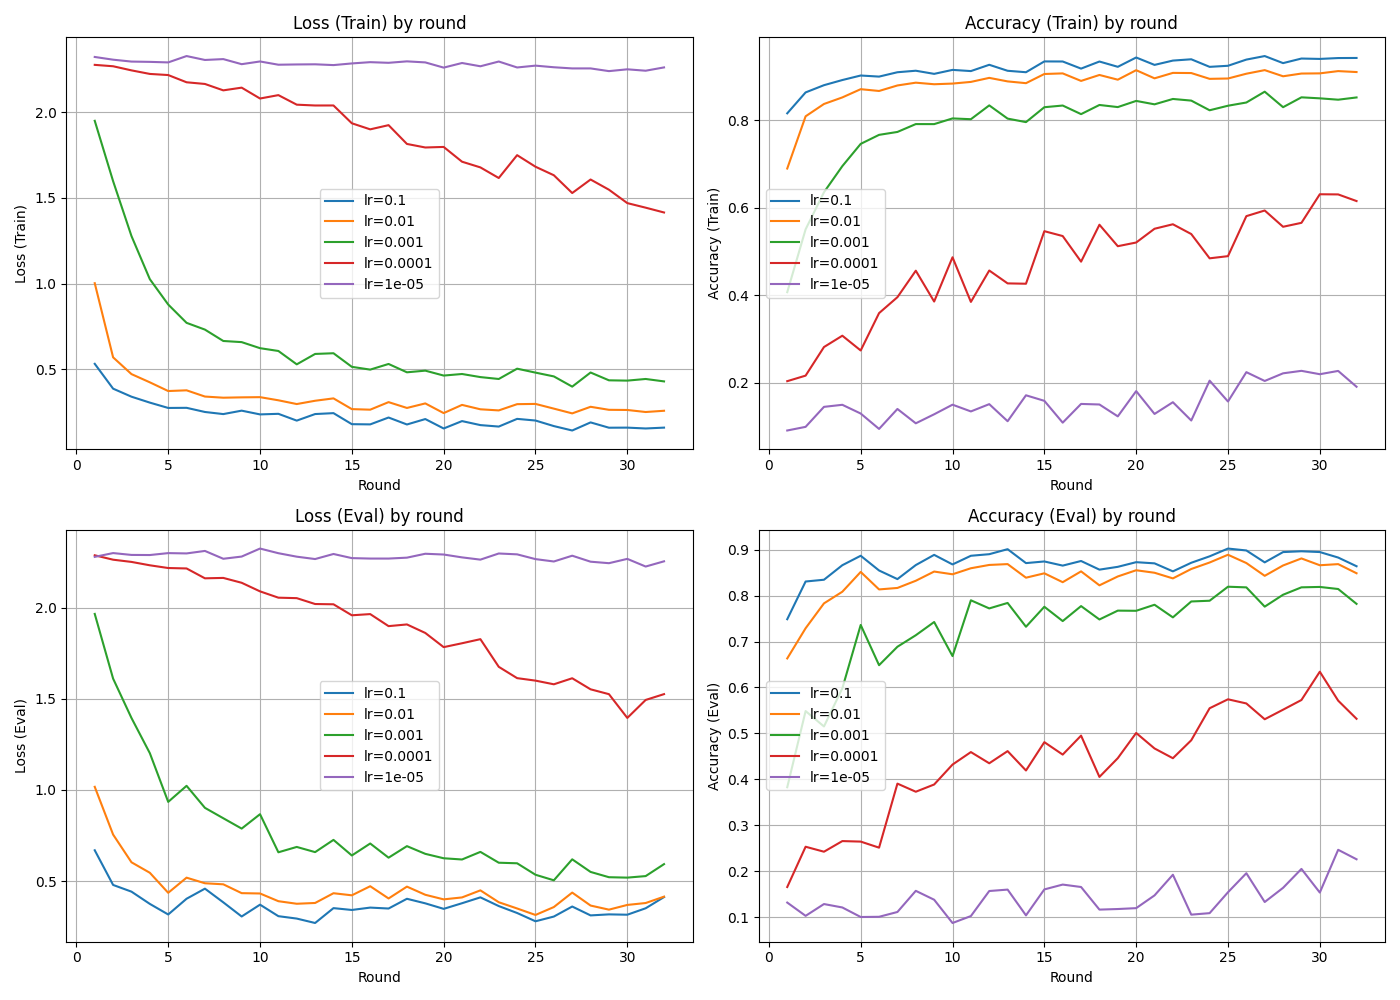

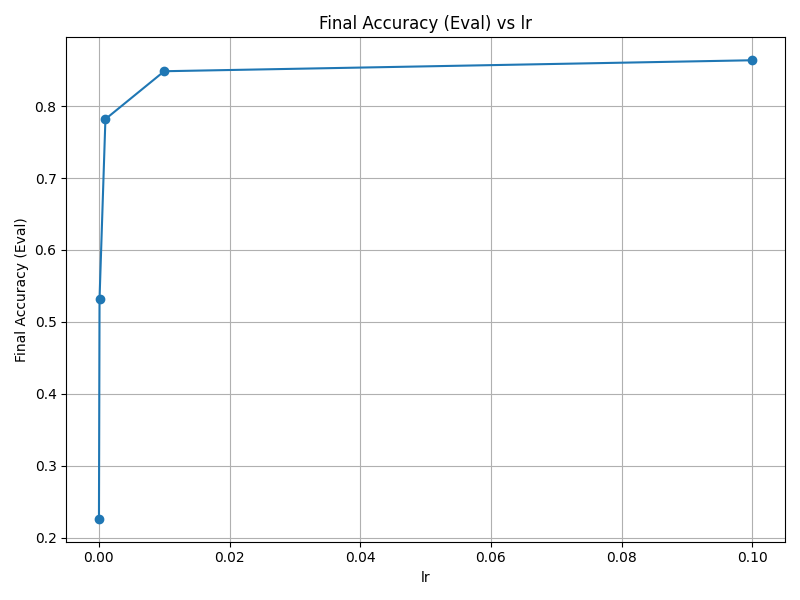

In [5]:
from IPython.display import Image, display

plot1_path = 'results_lr/plot1.png'
plot2_path = 'results_lr/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Experiment 6 - Different Dirichlet distribution parameter

In [ ]:
import os
import subprocess
import time
import shutil

folder = "results_alpha"


def run_experiment(alpha_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in alpha_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} alpha ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "32",
            "--epochs", "2",
            "--clients", "8",
            "--output", folder,
            "--batch", "16",
            "--lr", "0.01"
            "--alpha", str(a)
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(8):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", str(32)
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} alpha ===\n")

alpha_list = [0.1,1,10]
run_experiment(alpha_list)


=== Running test for 0.1 alpha ===
Started server (PID 7180)
Started client 0 (PID 7223)
Started client 1 (PID 7224)
Started client 2 (PID 7225)
Started client 3 (PID 7237)
Started client 4 (PID 7249)
Started client 5 (PID 7267)
Started client 6 (PID 7268)
Started client 7 (PID 7280)
=== Finished test for 0.1 alpha ===


=== Running test for 1 alpha ===
Started server (PID 10420)
Started client 0 (PID 10449)
Started client 1 (PID 10470)
Started client 2 (PID 10471)
Started client 3 (PID 10483)
Started client 4 (PID 10495)
Started client 5 (PID 10496)
Started client 6 (PID 10508)
Started client 7 (PID 10520)
=== Finished test for 1 alpha ===


=== Running test for 10 alpha ===
Started server (PID 12602)
Started client 0 (PID 12625)
Started client 1 (PID 12646)
Started client 2 (PID 12647)
Started client 3 (PID 12659)
Started client 4 (PID 12675)
Started client 5 (PID 12678)
Started client 6 (PID 12690)
Started client 7 (PID 12702)
=== Finished test for 10 alpha ===



In [7]:
! python vizualizer.py --folder results_alpha --param_index 5 --print_table

+--------+-------+--------+-------+------+-------+--------------------+--------------------+
| rounds | epoch | client | batch |  lr  | alpha |      accuracy      |        loss        |
+--------+-------+--------+-------+------+-------+--------------------+--------------------+
|   32   |   8   |   8    |   32  | 0.01 |  0.1  | 0.7288973384030418 | 1.1028718532491546 |
|   32   |   8   |   8    |   32  | 0.01 |  1.0  | 0.8667796088094871 | 0.4599040016249664 |
|   32   |   8   |   8    |   32  | 0.01 |  10.0 | 0.8872793872793873 | 0.3886151044340162 |
+--------+-------+--------+-------+------+-------+--------------------+--------------------+
Saved metric curve plots to results_alpha/plot1.png
Saved final accuracy vs param plot to results_alpha/plot2.png


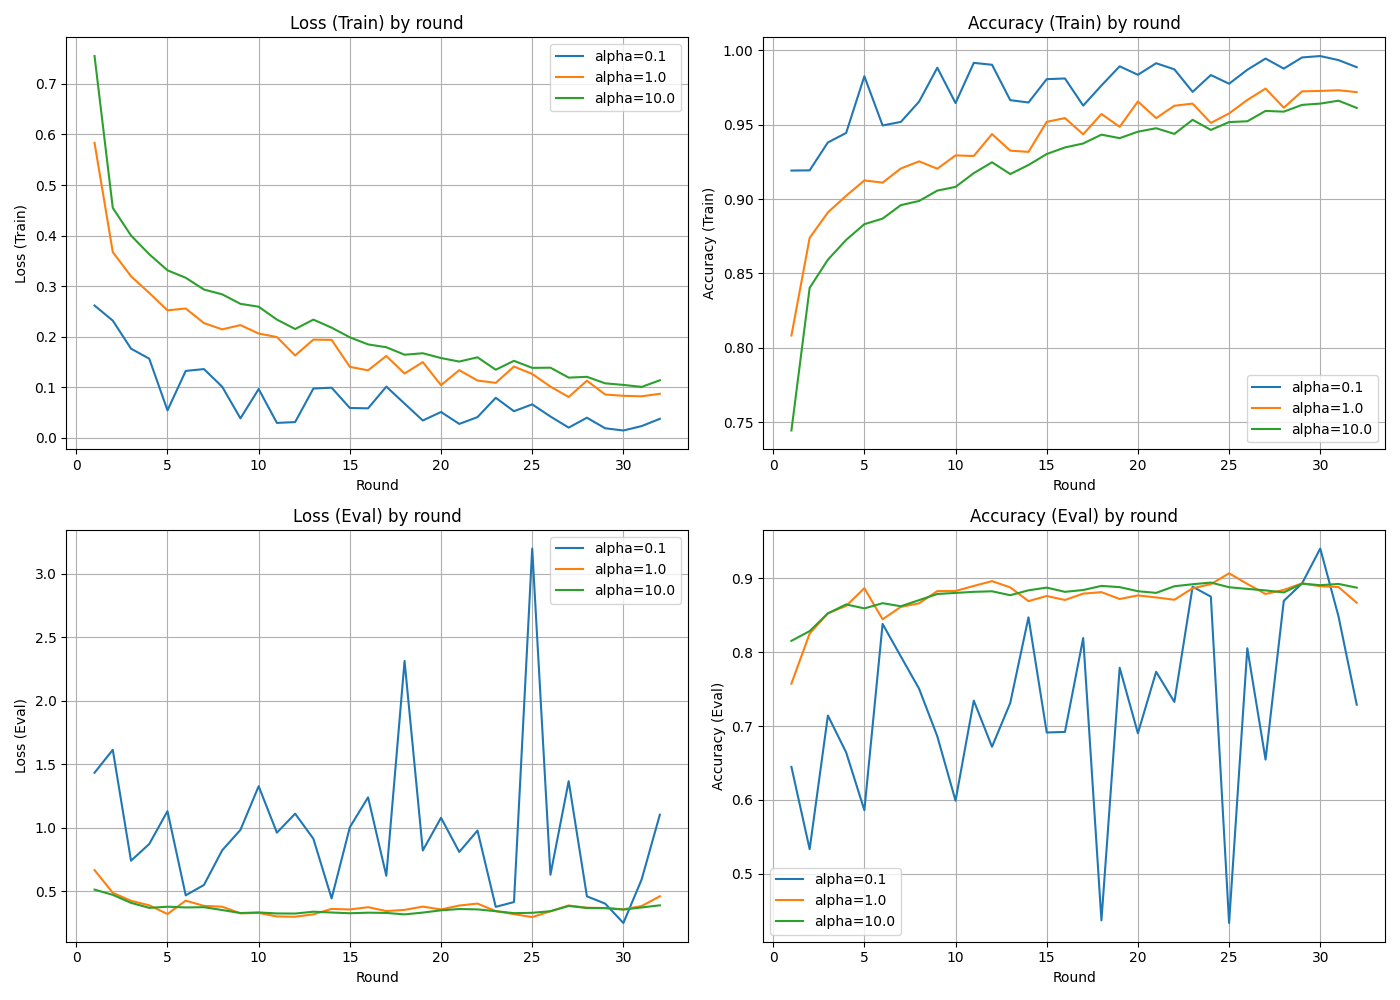

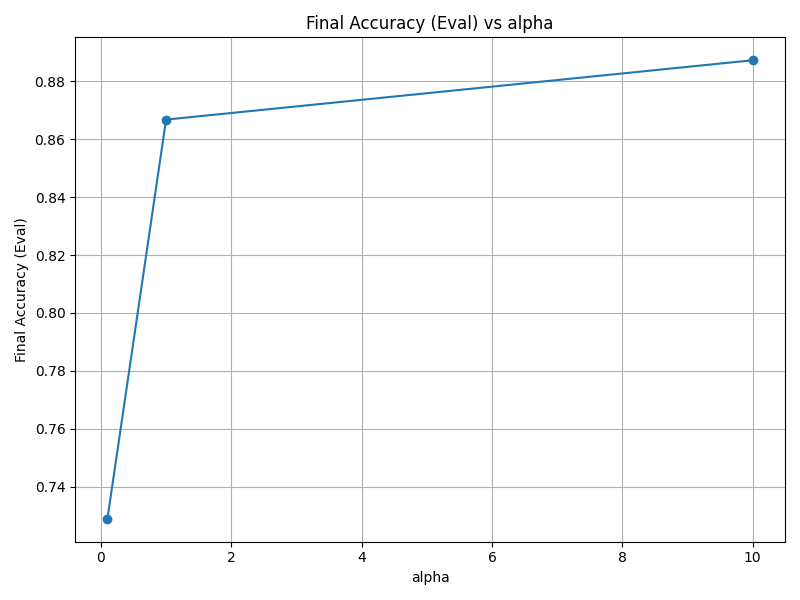

In [8]:
from IPython.display import Image, display

plot1_path = 'results_alpha/plot1.png'
plot2_path = 'results_alpha/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Experiment 7 - Different Dataset

In [ ]:
import os
import subprocess
import time
import shutil

folder = "results_dataset"


def run_experiment(dataset_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for dataset in dataset_list:
        log_folder = os.path.join(folder, f"logs_{dataset}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {dataset} ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "32",
            "--epochs", "2",
            "--clients", "8",
            "--output", folder,
            "--batch", "16",
            "--lr", "0.01"
            "--alpha", "1"
            "--dataset", dataset
        ]
        server_log_path = os.path.join(log_folder, f"server_{dataset}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)
        if dataset == "cifar10":
            print("Loading CIFAR-10, might take some time...")
            time.sleep(30)

        client_procs = []
        for cid in range(8):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", str(32),
                "--dataset", dataset
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_{dataset}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {dataset} ===\n")

dataset_list = ["cifar10", "fashionmnist"]
run_experiment(dataset_list)


=== Running test for cifar10 ===
Started server (PID 21535)
Loading CIFAR-10, might take some time...
Started client 0 (PID 21644)
Started client 1 (PID 21645)
Started client 2 (PID 21646)
Started client 3 (PID 21658)
Started client 4 (PID 21670)
Started client 5 (PID 21680)
Started client 6 (PID 21689)
Started client 7 (PID 21701)
=== Finished test for cifar10 ===


=== Running test for fashionmnist ===
Started server (PID 28789)
Started client 0 (PID 28812)
Started client 1 (PID 28813)
Started client 2 (PID 28814)
Started client 3 (PID 28850)
Started client 4 (PID 28853)
Started client 5 (PID 28865)
Started client 6 (PID 28877)
Started client 7 (PID 28889)
=== Finished test for fashionmnist ===



In [19]:
! python vizualizer.py --folder results_dataset --param_index 6 --print_table --dataset

+--------+-------+--------+-------+------+-------+--------------+--------------------+--------------------+
| rounds | epoch | client | batch |  lr  | alpha |   dataset    |      accuracy      |        loss        |
+--------+-------+--------+-------+------+-------+--------------+--------------------+--------------------+
|  128   |   8   |   8    |   32  | 0.01 |  1.0  |   CIFAR-10   | 0.5449474361724952 | 3.5875571851846972 |
|  128   |   8   |   8    |   32  | 0.01 |  1.0  | FashionMNIST | 0.8829807509052792 | 0.6961387031210566 |
+--------+-------+--------+-------+------+-------+--------------+--------------------+--------------------+
['rounds', 'epoch', 'client', 'batch', 'lr', 'alpha', 'dataset']
Saved metric curve plots to results_dataset/plot1.png
Saved final accuracy vs param plot to results_dataset/plot2.png


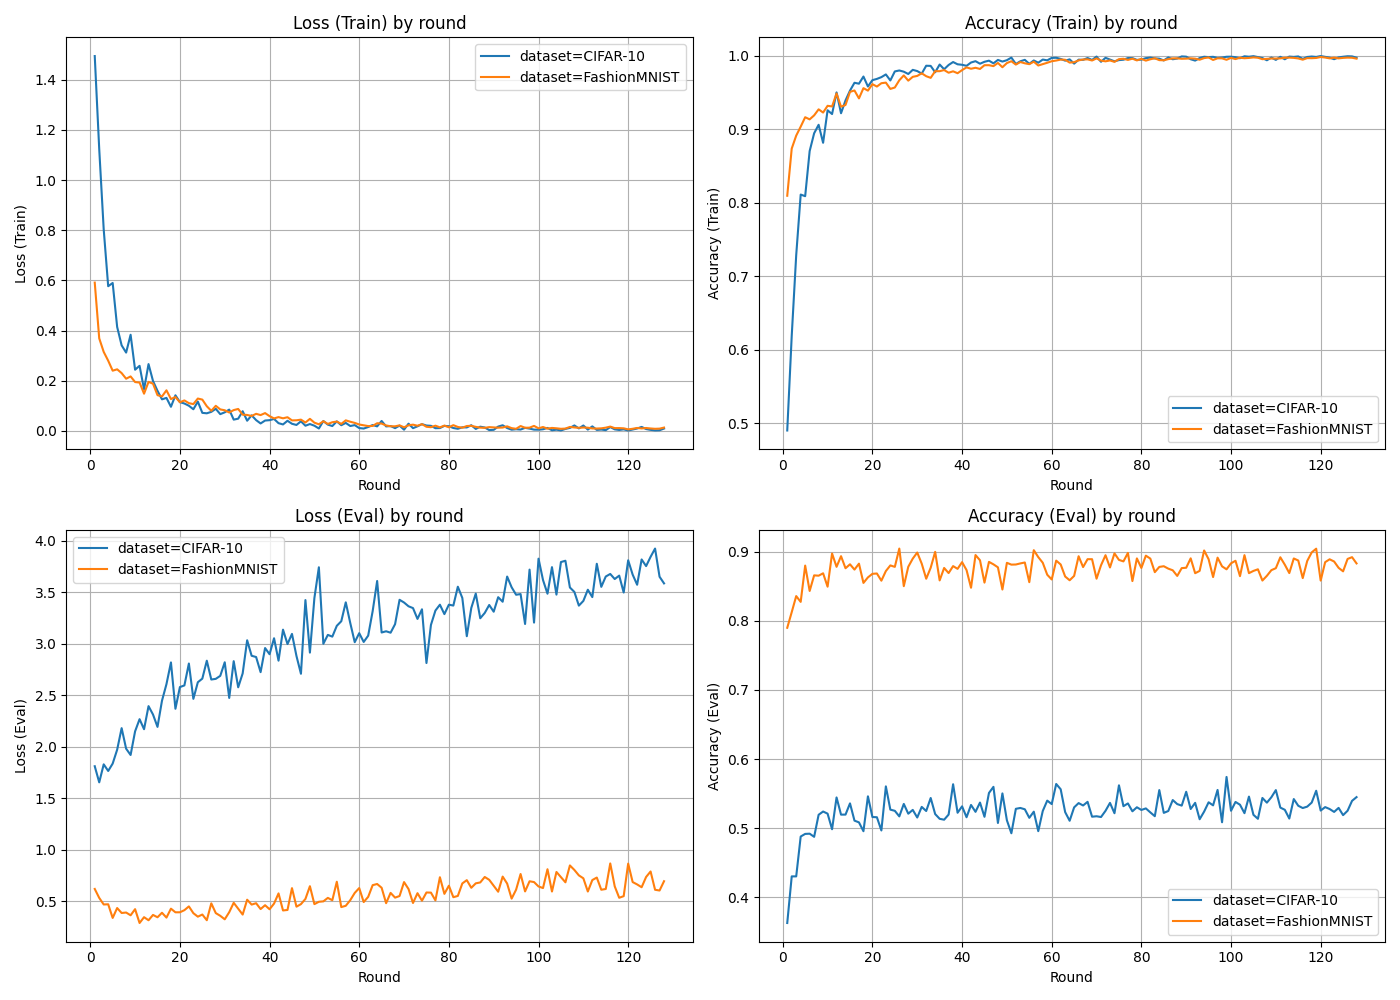

In [20]:
from IPython.display import Image, display

plot1_path = 'results_dataset/plot1.png'

display(Image(filename=plot1_path))